In [77]:
#kütüphaneleri aktardık
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import statistics
%matplotlib inline

In [78]:
#veriyi okuduk
df = pd.read_csv("bodyPerformance.csv") 

# EDA (Keşifsel Veri Analizi)

In [79]:
#verinin şeklini inceledik
df.shape

(13393, 12)

In [80]:
#bu kod ile veride null değer olmadığını ve data typeının int olduğunu tespit ettik
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [81]:
df.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0    M      172.3      75.24       21.3       80.0       130.0    
1  25.0    M      165.0      55.80       15.7       77.0       126.0    
2  31.0    M      179.6      78.00       20.1       92.0       152.0    
3  32.0    M      174.5      71.10       18.4       76.0       147.0    
4  28.0    M      173.8      67.70       17.1       70.0       127.0    

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0    54.9              18.4                 60.0           217.0        C   
1    36.4              16.3                 53.0           229.0        A   
2    44.8              12.0                 49.0           181.0        C   
3    41.4              15.2                 53.0           219.0        B   
4    43.5              27.1                 45.0           217.0        B

In [82]:
#df column adlarını düzenleyelim
df = df.rename(columns={"body fat_%":"body_fat", "height_cm":"height", "weight_kg":"weight", 
                        "sit and bend forward_cm":"bend_forward", "gripForce":"grip_force","sit-ups counts":"sit_ups", 
                        "broad jump_cm":"broad_jump"})

In [83]:
df.sample(10) #yeni isimlerle birlikte rastgele 10 satırı inceledik

age gender  height  weight  body_fat  diastolic  systolic  grip_force  \
9433   28.0    M     171.1   80.7     25.2      79.0       134.0      42.9      
12056  39.0    M     177.7   68.6     19.1      87.0       147.0      40.4      
3870   25.0    F     161.7   54.4     26.7      81.0       141.0      22.5      
11245  25.0    M     173.5   97.6     33.4      89.0       138.0      36.6      
8803   26.0    M     171.6   74.7     24.5      82.0       115.0      40.0      
4486   49.0    M     167.4   64.1     21.4      82.0       121.0      37.4      
43     33.0    F     159.6   60.5     32.1      62.0       106.0      21.9      
7084   23.0    F     155.5   46.5     25.2      57.0       101.0      20.8      
2891   24.0    M     184.7   38.6      9.0      81.0       137.0      55.0      
7685   48.0    M     176.5   66.1      8.1      80.0       129.0      39.3      

       bend_forward  sit_ups  broad_jump class  
9433       12.1       31.0       207.0      D   
12056       2.8       44.0       240.0      D   
3870       15.8       26.0       146.0      C   
11245      12.3       39.0       222.0      D   
8803       12.6       47.0       204.0      C   
4486       22.7       37.0       215.0      B   
43         22.2       24.0       129.0      C   
7084        7.5       24.0       165.0      D   
2891       19.6       56.0       242.0      A   
7685       14.1       33.0       204.0      C

In [84]:
#numerik ve kategorik değerler için bir ayrım yapalım
numeric_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(include='object')

In [85]:
numeric_data

age  height  weight  body_fat  diastolic  systolic  grip_force  \
0      27.0   172.3   75.24    21.3      80.0       130.0      54.9      
1      25.0   165.0   55.80    15.7      77.0       126.0      36.4      
2      31.0   179.6   78.00    20.1      92.0       152.0      44.8      
3      32.0   174.5   71.10    18.4      76.0       147.0      41.4      
4      28.0   173.8   67.70    17.1      70.0       127.0      43.5      
...     ...     ...     ...       ...        ...       ...         ...   
13388  25.0   172.1   71.80    16.2      74.0       141.0      35.8      
13389  21.0   179.7   63.90    12.1      74.0       128.0      33.0      
13390  39.0   177.2   80.50    20.1      78.0       132.0      63.5      
13391  64.0   146.1   57.70    40.4      68.0       121.0      19.3      
13392  34.0   164.0   66.10    19.5      82.0       150.0      35.9      

       bend_forward  sit_ups  broad_jump  
0          18.4       60.0       217.0    
1          16.3       53.0       229.0    
2          12.0       49.0       181.0    
3          15.2       53.0       219.0    
4          27.1       45.0       217.0    
...             ...      ...         ...  
13388      17.4       47.0       198.0    
13389       1.1       48.0       167.0    
13390      16.4       45.0       229.0    
13391       9.2        0.0        75.0    
13392       7.1       51.0       180.0    

[13393 rows x 10 columns]

In [86]:
categorical_data

gender class
0        M      C 
1        M      A 
2        M      C 
3        M      B 
4        M      B 
...      ...   ...
13388    M      C 
13389    M      D 
13390    M      A 
13391    F      D 
13392    M      C 

[13393 rows x 2 columns]

In [87]:
numeric_data.mean()

age              36.775106
height          168.559807
weight           67.447316
body_fat         23.240165
diastolic        78.796842
systolic        130.234817
grip_force       36.963877
bend_forward     15.209268
sit_ups          39.771224
broad_jump      190.129627
dtype: float64

In [88]:
for i in numeric_data.columns:
    print(f"{i}: {statistics.median(numeric_data[i])}")

age: 32.0
height: 169.2
weight: 67.4
body_fat: 22.8
diastolic: 79.0
systolic: 130.0
grip_force: 37.9
bend_forward: 16.2
sit_ups: 41.0
broad_jump: 193.0


In [89]:
df.mode()

age gender  height  weight  body_fat  diastolic  systolic  grip_force  \
0  21.0     M    170.0   70.5     23.1      80.0       120.0      43.1      
1   NaN   NaN      NaN    NaN      NaN       NaN         NaN       NaN      

   bend_forward  sit_ups  broad_jump class  
0      20.0       45.0       211.0      C   
1       NaN        NaN         NaN      D

In [90]:
#varyans hesapladık
for i in numeric_data.columns:
    print(f"{i}: {statistics.variance(numeric_data[i])}")

age: 185.6580511106169
height: 71.00729348140636
weight: 142.79452570203424
body_fat: 52.66178600041373
diastolic: 115.39127511955682
systolic: 216.50042823887298
grip_force: 112.88773559936443
bend_forward: 71.51538603861185
sit_ups: 203.82411511666297
broad_jump: 1589.4574345759268


In [91]:
#standart sapma hesapladık
for i in numeric_data.columns:
    print(f"{i}: {statistics.stdev(numeric_data[i])}")

age: 13.625639475291312
height: 8.426582550560243
weight: 11.949666342707408
body_fat: 7.256844079929906
diastolic: 10.742033099909758
systolic: 14.713953521704253
grip_force: 10.624864027335335
bend_forward: 8.456677009240204
sit_ups: 14.276698326877366
broad_jump: 39.86800013263679


In [92]:
#sütunların çarpıklık katsayısını hesaplar
numeric_data.skew()


age             0.599896
height         -0.186882
weight          0.349805
body_fat        0.361132
diastolic      -0.159637
systolic       -0.048654
grip_force      0.018456
bend_forward    0.785492
sit_ups        -0.467830
broad_jump     -0.422623
dtype: float64

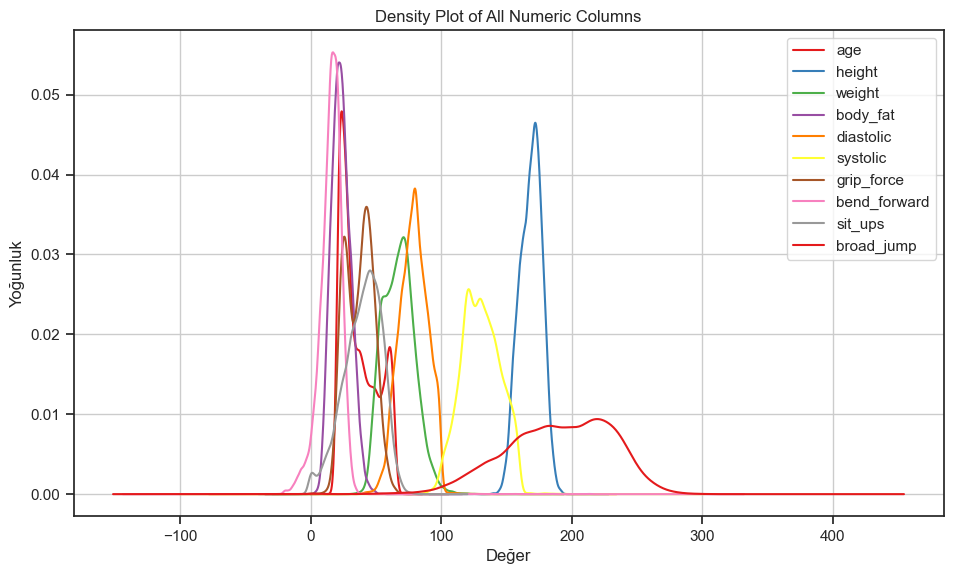

In [93]:
#dataframe in yoğunluk eğrisini inceleyelim
plt.figure(figsize=(10, 6))  # Grafik boyutu
for column in numeric_data.columns:
    numeric_data[column].plot(kind='kde', label=column)

plt.title('Density Plot of All Numeric Columns')
plt.xlabel('Değer')
plt.ylabel('Yoğunluk')
plt.legend()
plt.grid(True)
plt.savefig("density_plot.jpg", format='jpg', dpi=300)
plt.show()

In [94]:
num_columns = len(numeric_data.columns)
num_columns

10

In [95]:
cols = 2
rows = math.ceil(num_columns/cols)

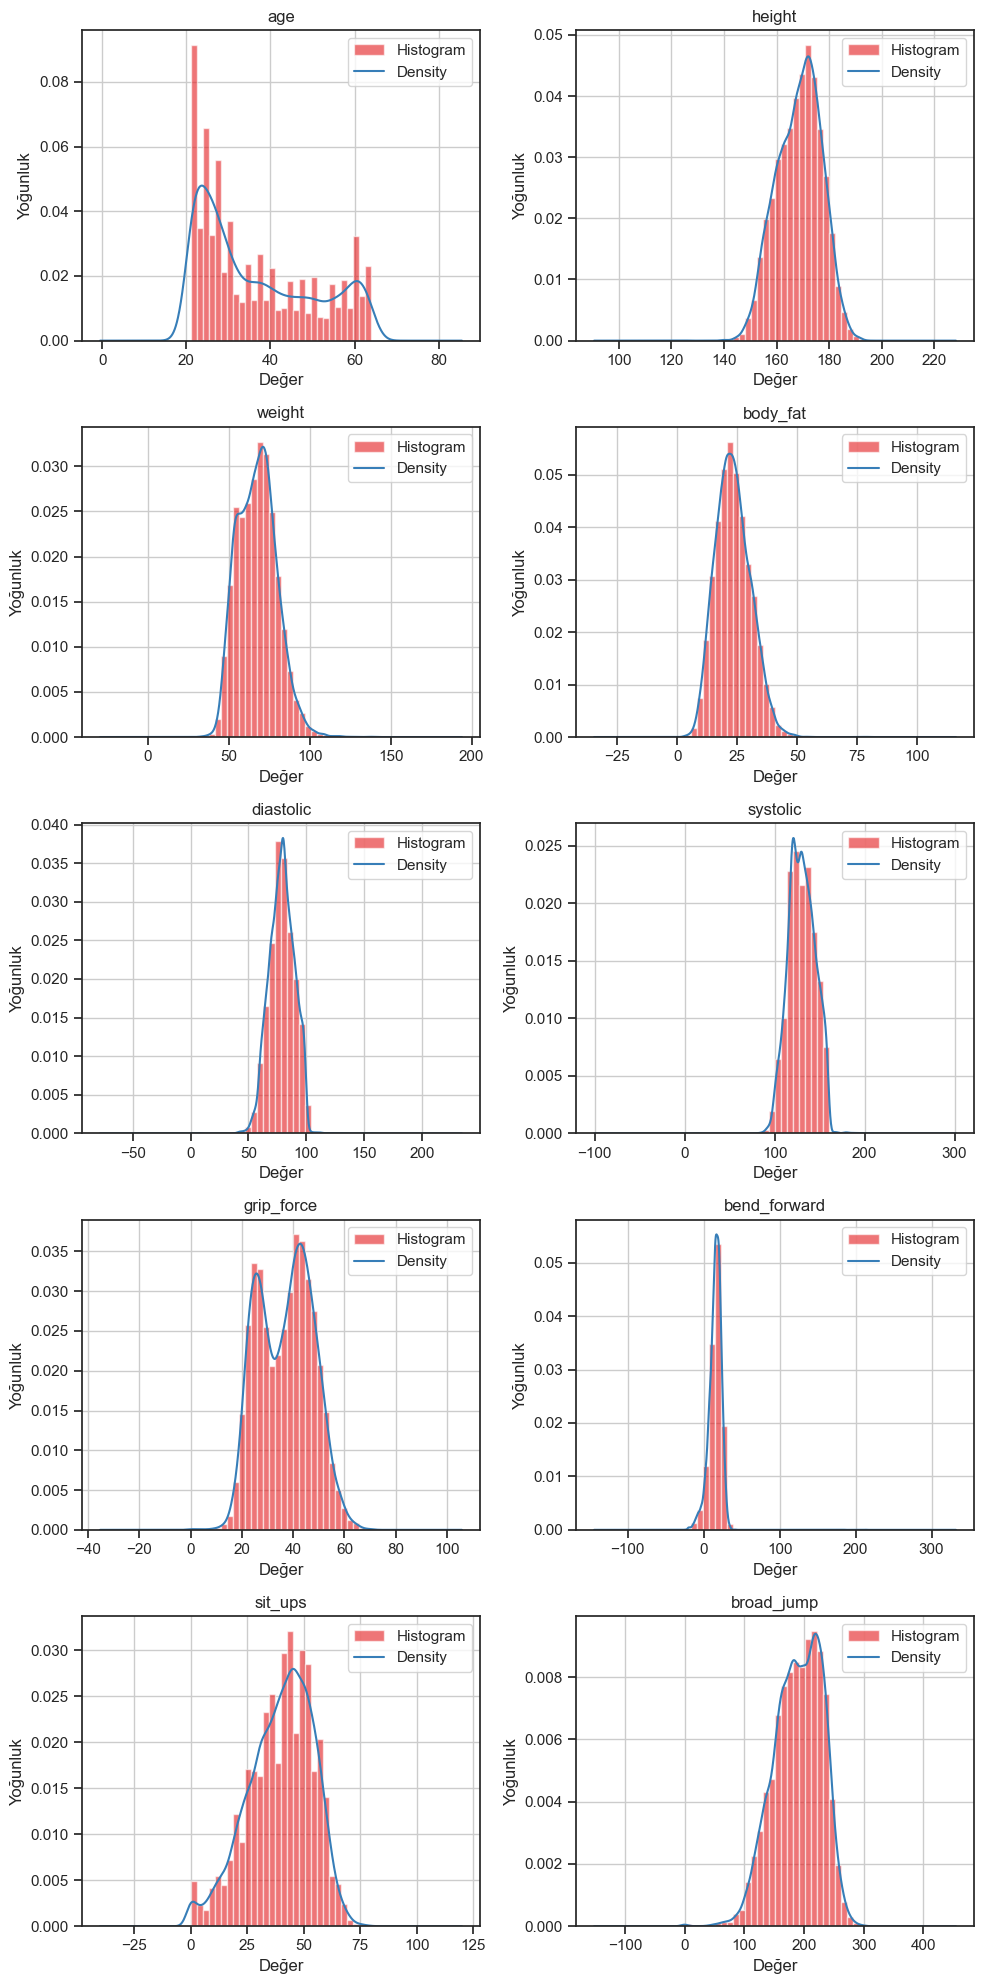

<Figure size 640x480 with 0 Axes>

In [96]:
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4)) #tüm figürün eksenlerinin genişlik yükseklik ayarını yaptık
axes = axes.flatten()# 5️⃣ axes dizisini düzleştir (flatten), böylece tek boyutlu liste gibi erişebiliriz, aksi halde axes[row][col] şeklinde erişmek gerekirdi

# Her sütun için ayrı subplot'ta hem histogram hem KDE çiz
for i, column in enumerate(numeric_data.columns):
    ax = axes[i] # İlgili subplot eksenini al
    # Histogram (density=True → toplam alan = 1)
    # kind='hist': histogram grafiği
    # bins=30: 30 aralık (bin) ile
    # density=True: toplam alan 1'e normalize edilir (KDE ile uyumlu)
    # alpha=0.6: yarı saydamlık (0=şeffaf, 1=opak)
    # ax=ax: bu grafiği ilgili subplot eksenine çiz
    # label='Histogram': legend'de görünecek isim
    numeric_data[column].plot(kind='hist', bins=30, density=True, alpha=0.6, ax=ax, label='Histogram')

    # KDE (density) eğrisi çiziyoruz:
    # kind='kde': yoğunluk fonksiyonu (pürüzsüz eğri)
    # ax=ax: yine aynı subplot'a çiz
    # label='Density': legend'de görünecek isim
    numeric_data[column].plot(kind='kde', ax=ax, label='Density')
    # Başlık ve etiketler
    ax.set_title(column)
    ax.set_xlabel('Değer')
    ax.set_ylabel('Yoğunluk')
    ax.legend()     # Legend ekliyoruz (hangi renk neyi temsil ediyor görünsün diye)
    ax.grid(True)

plt.tight_layout() # Grafikler arası boşlukları ve hizalamayı düzgün yapıyoruz
plt.show()
plt.savefig("all_density_hist_subplots.jpg", format='jpg', dpi=300)


📌 Örnek yorumlama
1️⃣ Eğer histogram simetrik ve KDE de düzgün çan şeklinde → normal dağılıma yakın (örneğin boy, kilo verileri).

2️⃣ Eğer histogramın sağ kuyruğu uzun ve KDE sağa doğru uzuyorsa → sağa çarpık (örn. gelir, satış, ev fiyatları → az sayıda çok yüksek değer).

3️⃣ Eğer histogramın sol kuyruğu uzun ve KDE sola doğru uzuyorsa → sola çarpık (örn. negatif skorlar veya sınırlı pozitif değerler).

4️⃣ Eğer histogramın birden fazla tepesi varsa → çok tepe (multimodal) dağılım (örn. veride birden fazla grup veya küme var).

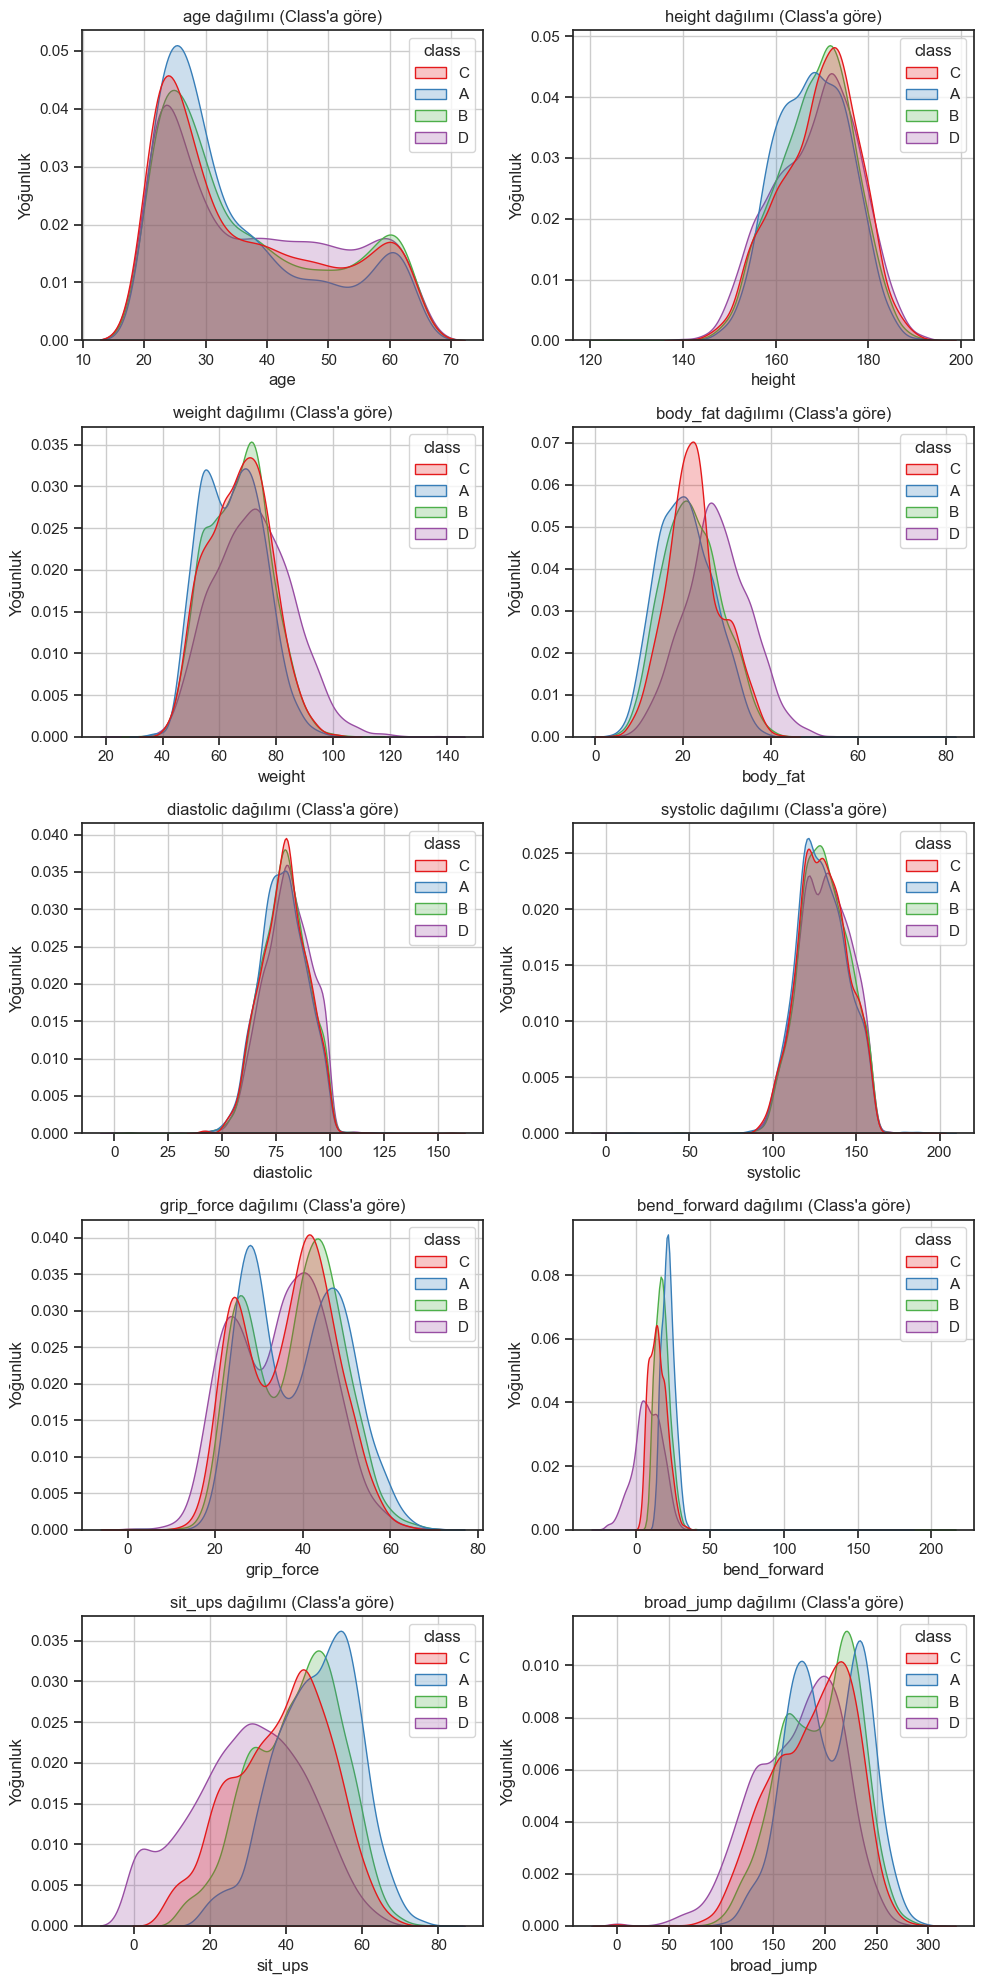

In [97]:
#class adlı kolona göre
class_column = 'class' 

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, column in enumerate(numeric_data.columns):
    ax = axes[i]
    sns.kdeplot(data=df, x=column, hue=class_column, common_norm=False, fill=True, ax=ax)
    ax.set_title(f"{column} dağılımı (Class'a göre)")
    ax.set_xlabel(column)
    ax.set_ylabel('Yoğunluk')
    ax.grid(True)


plt.tight_layout()
plt.savefig("class_grouped_density_plots.jpg", format='jpg', dpi=300)
plt.show()


In [98]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           13393 non-null  float64
 1   height        13393 non-null  float64
 2   weight        13393 non-null  float64
 3   body_fat      13393 non-null  float64
 4   diastolic     13393 non-null  float64
 5   systolic      13393 non-null  float64
 6   grip_force    13393 non-null  float64
 7   bend_forward  13393 non-null  float64
 8   sit_ups       13393 non-null  float64
 9   broad_jump    13393 non-null  float64
dtypes: float64(10)
memory usage: 1.0 MB


In [99]:
for col in numeric_data.columns:
    range = df[col].max() - df[col].min()
    print('range of %s : %d'%(col,range))

range of age : 43
range of height : 68
range of weight : 111
range of body_fat : 75
range of diastolic : 156
range of systolic : 201
range of grip_force : 70
range of bend_forward : 238
range of sit_ups : 80
range of broad_jump : 303


In [100]:
#mean absolute deviation h-yani mutlak farkların ortalaması
mad_values = numeric_data.apply(lambda x: (x - x.mean()).abs().mean(), axis=0)
mad_values

age             11.844362
height           6.919084
weight           9.680199
body_fat         5.833442
diastolic        8.651310
systolic        12.026424
grip_force       9.068306
bend_forward     6.268510
sit_ups         11.571289
broad_jump      32.726099
dtype: float64

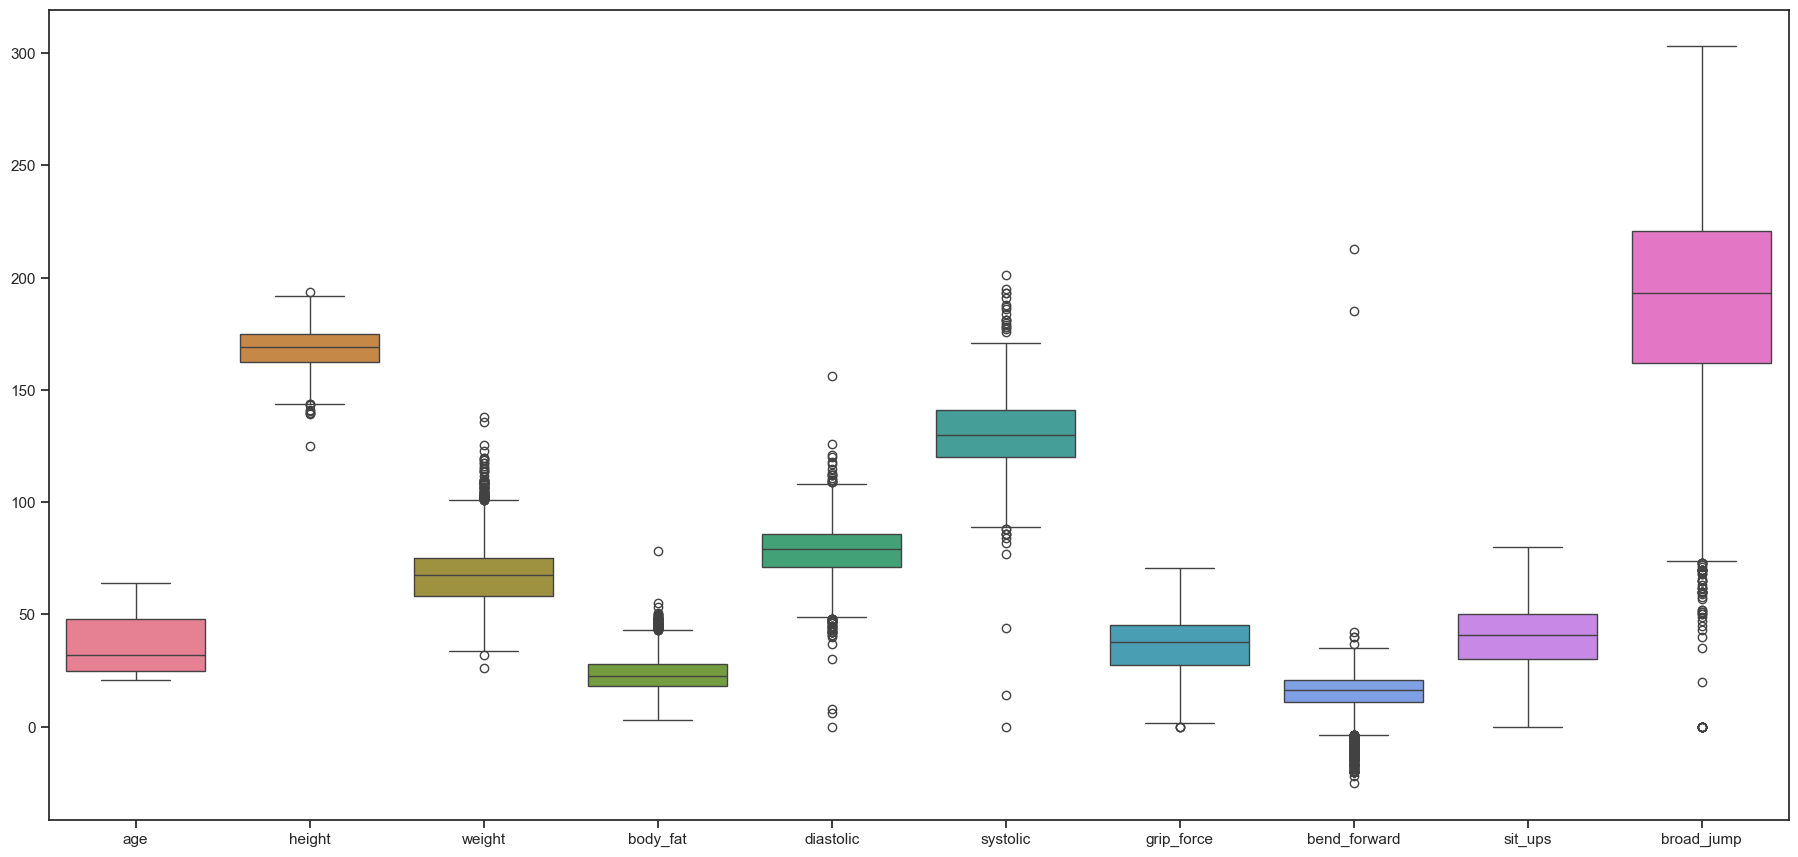

In [101]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = numeric_data)
plt.savefig("all_numeric_boxplots.jpg", format='jpg', dpi=1000)

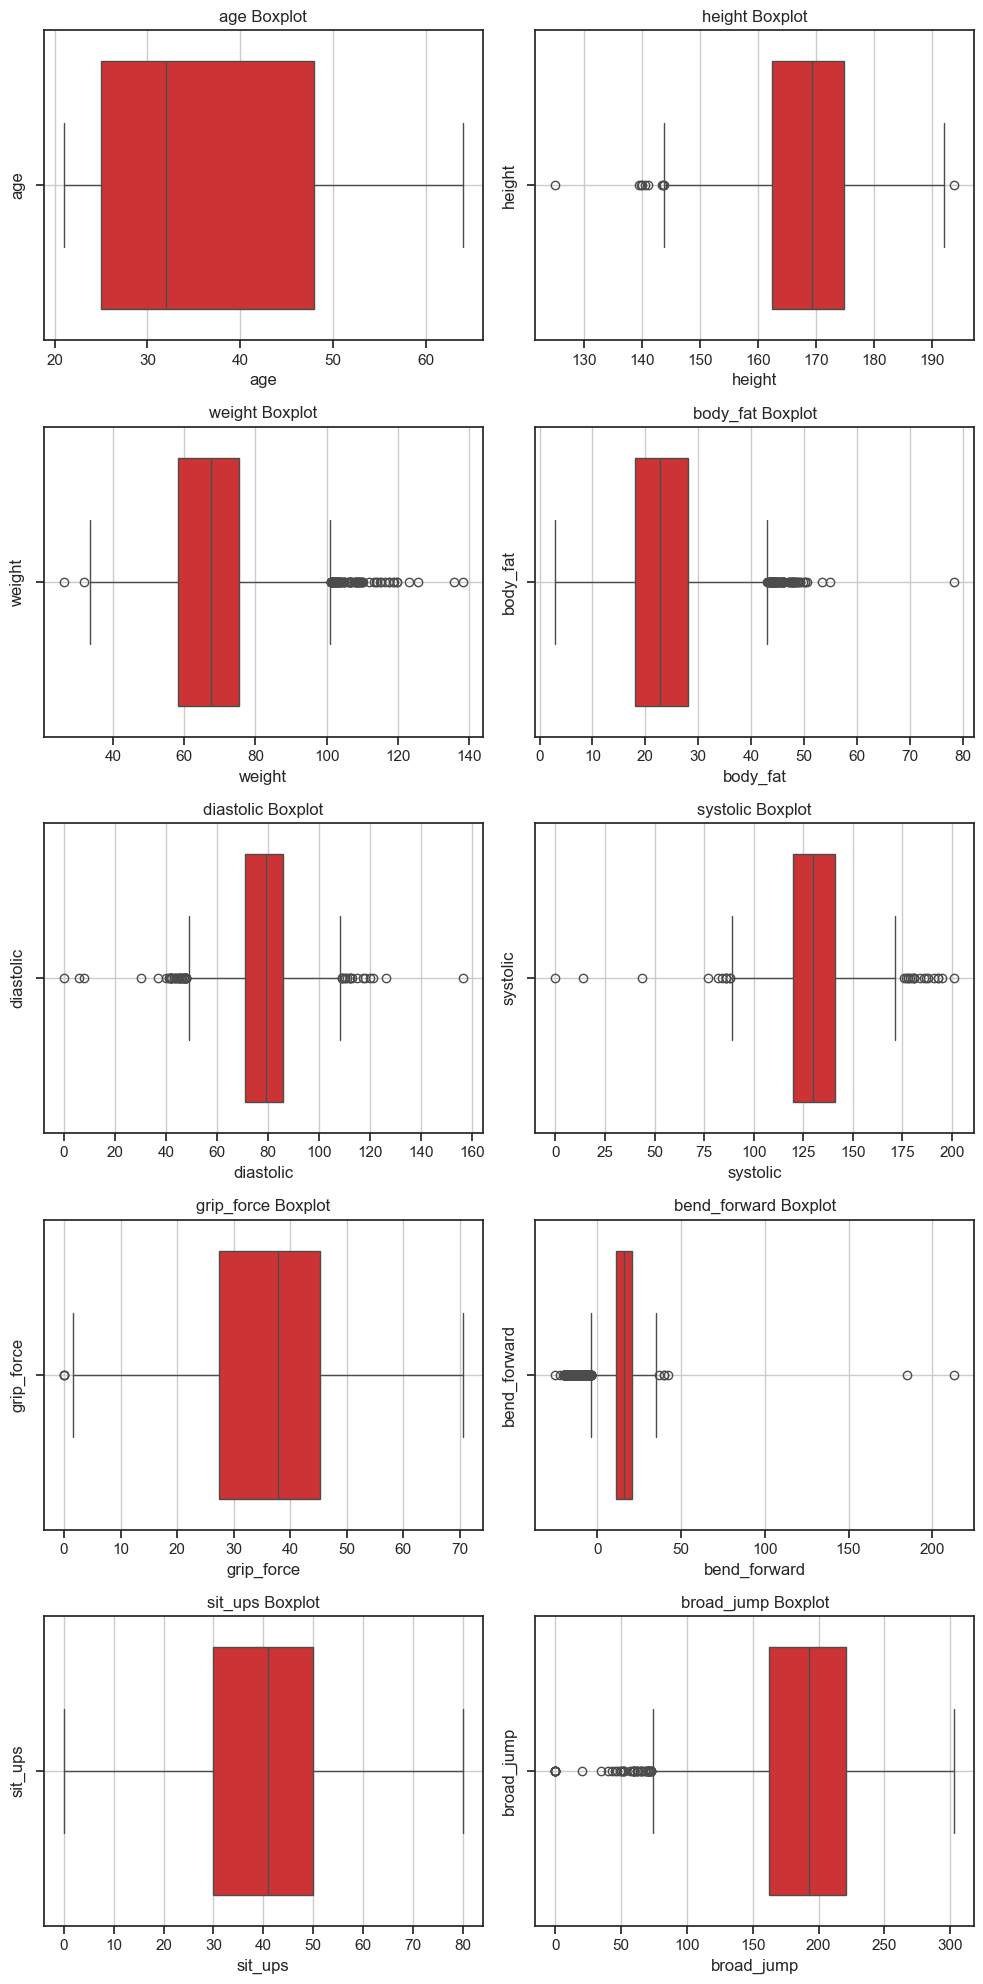

In [102]:
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()
# Her sütun için ayrı boxplot çiz
for i, column in enumerate(numeric_data.columns):
    ax = axes[i]
    sns.boxplot(x=numeric_data[column], ax=ax)
    ax.set_title(f"{column} Boxplot")
    ax.set_ylabel(column)
    ax.grid(True)

plt.tight_layout()
plt.savefig("numeric_boxplot_graphics.jpg", format='jpg', dpi=1000)
plt.show()

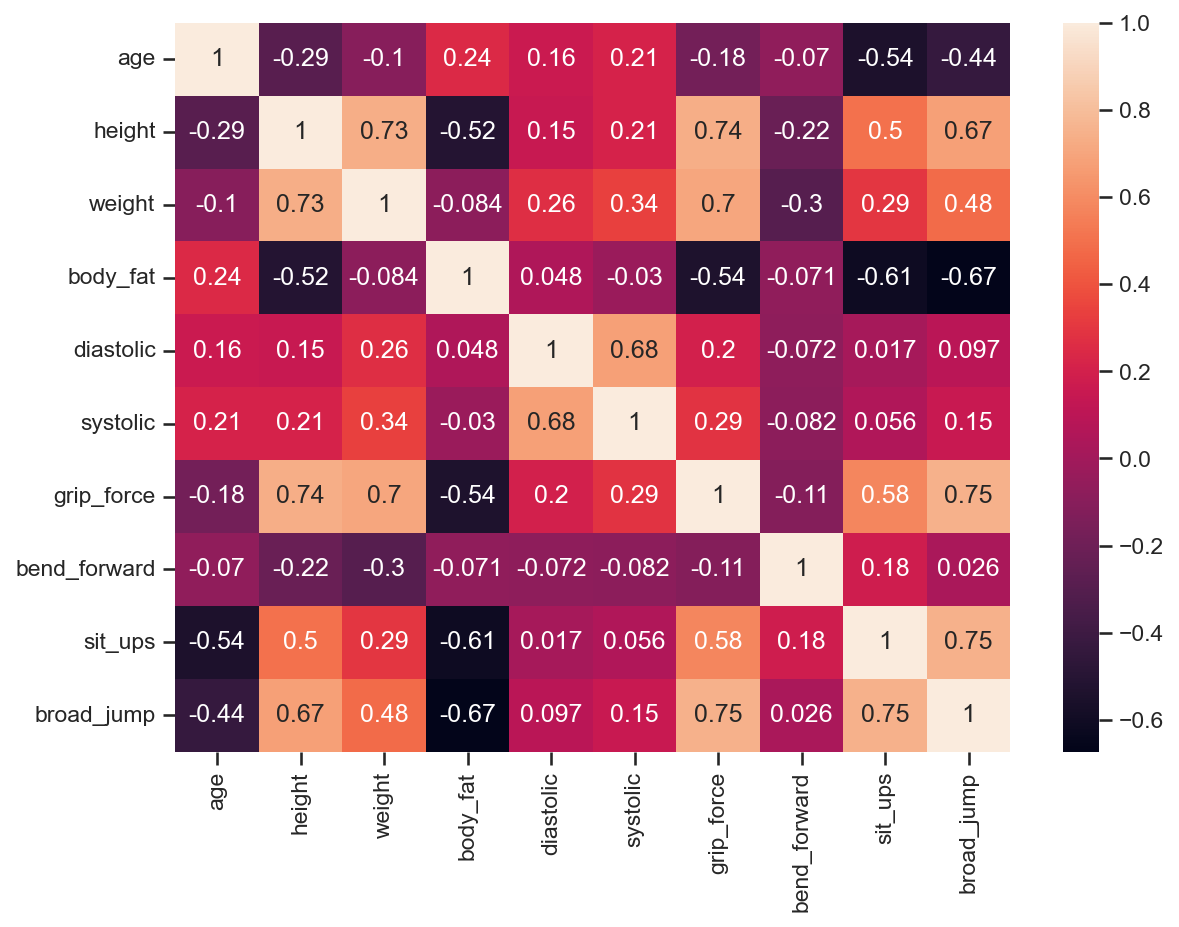

In [103]:
plt.figure(figsize=(8,6),dpi = 150)
sns.heatmap(numeric_data.corr(),annot = True)
plt.savefig("numeric_correlation_table.jpg", format='jpg', dpi=1000)


Shape of your Data Set loaded: (13393, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################
There are 1 duplicate rows in your dataset
    Alert: Dropping duplicate rows can sometimes cause your column data types to change to object!
    All variables classified into correct types.


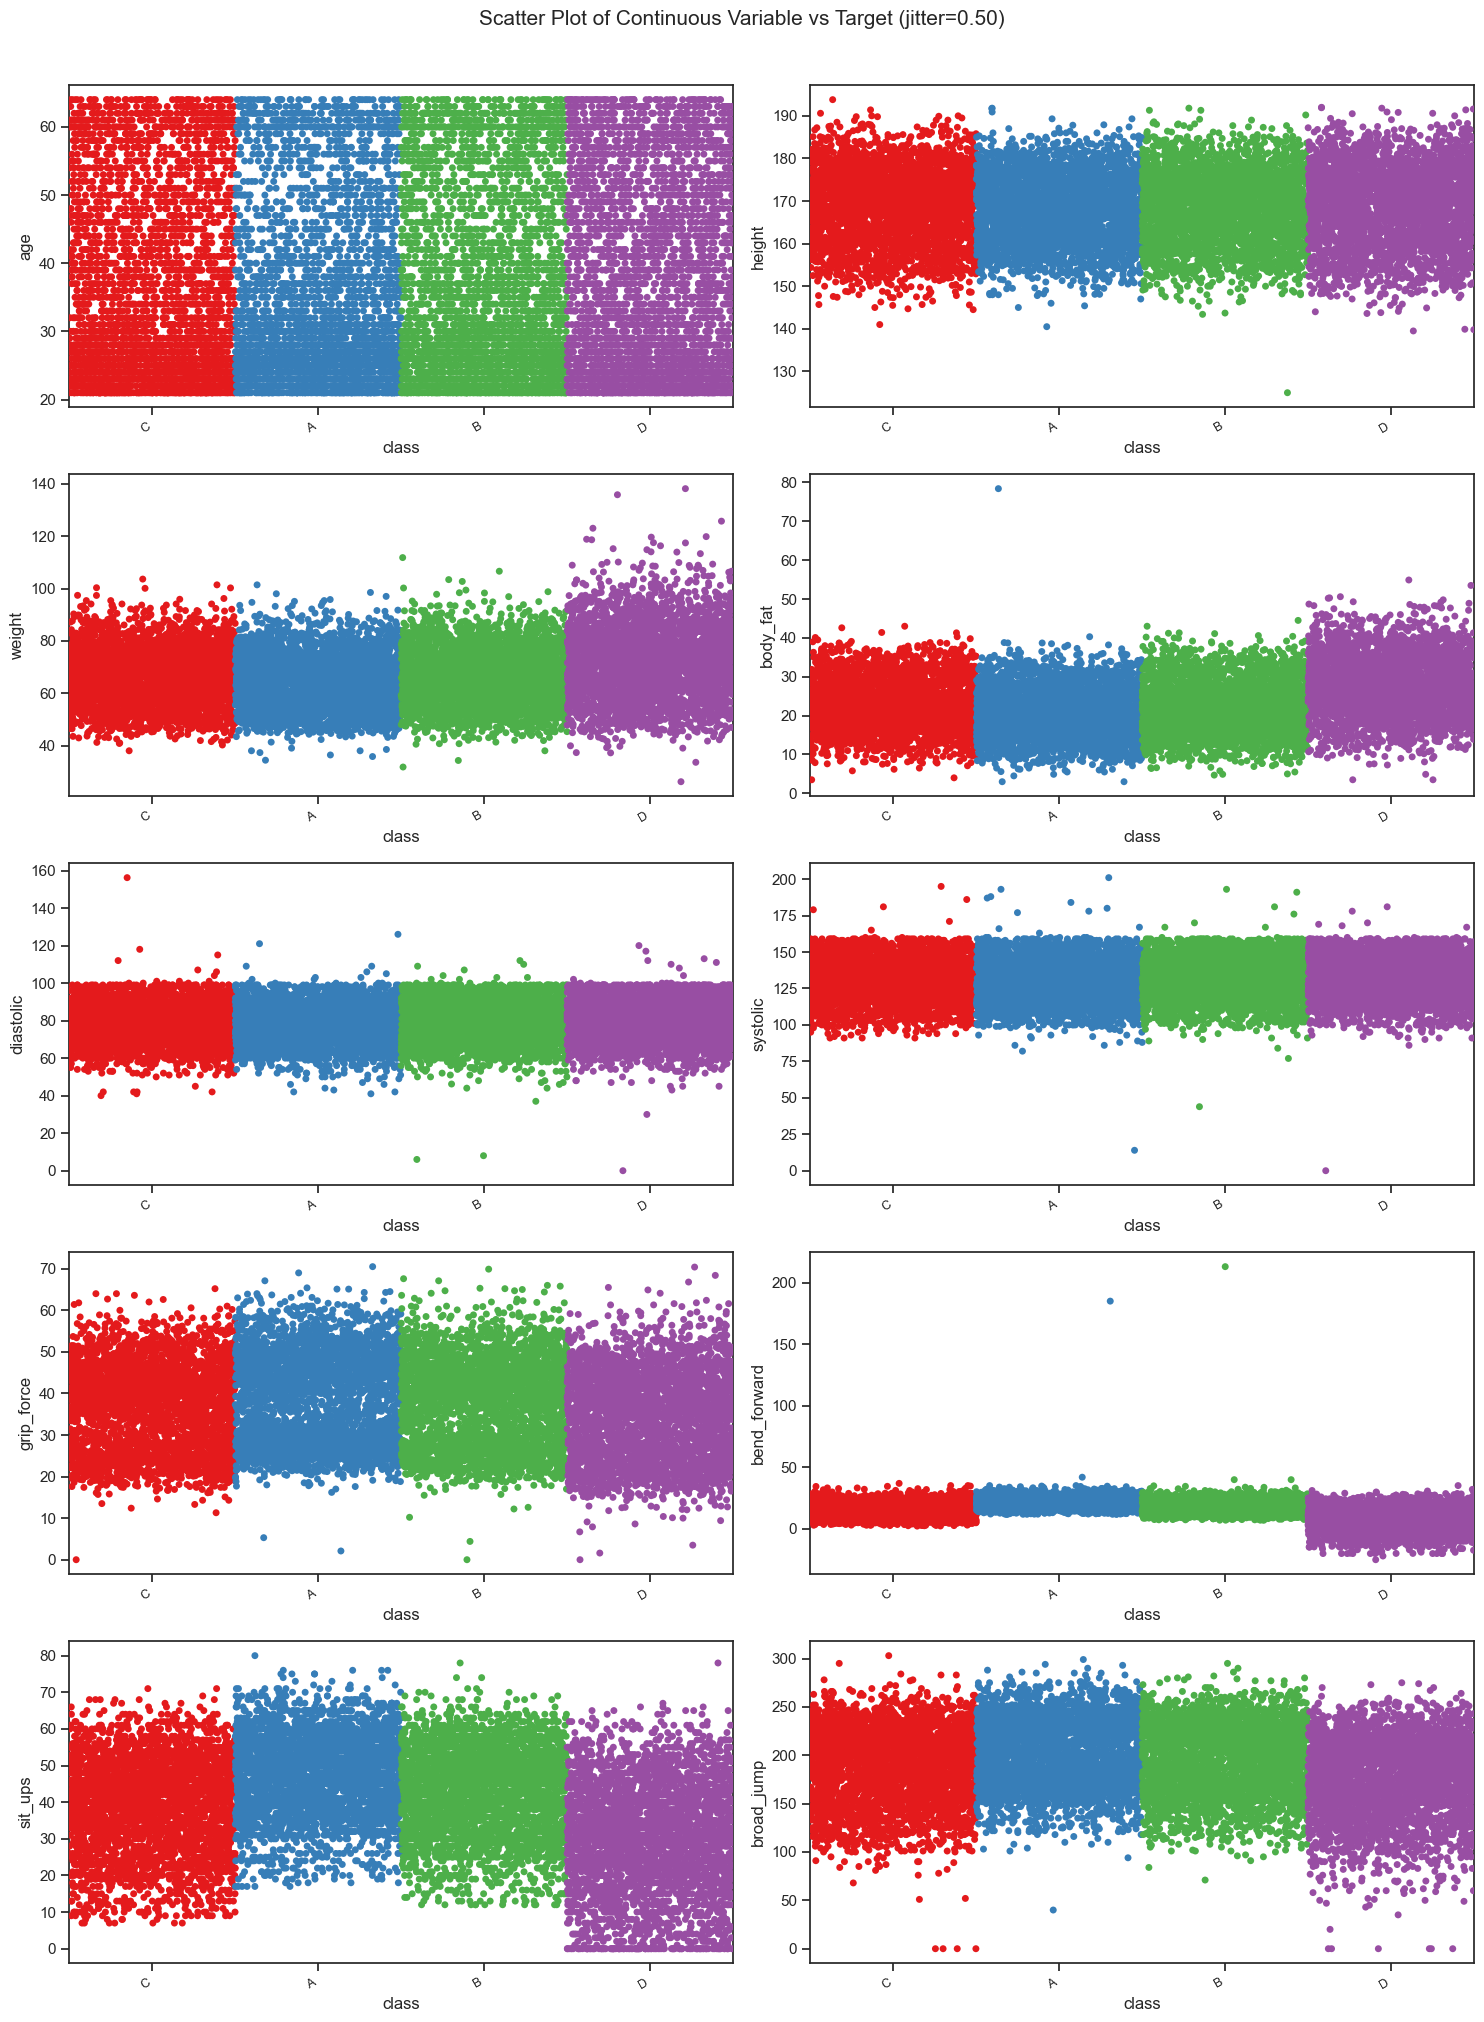

Total Number of Scatter Plots = 55


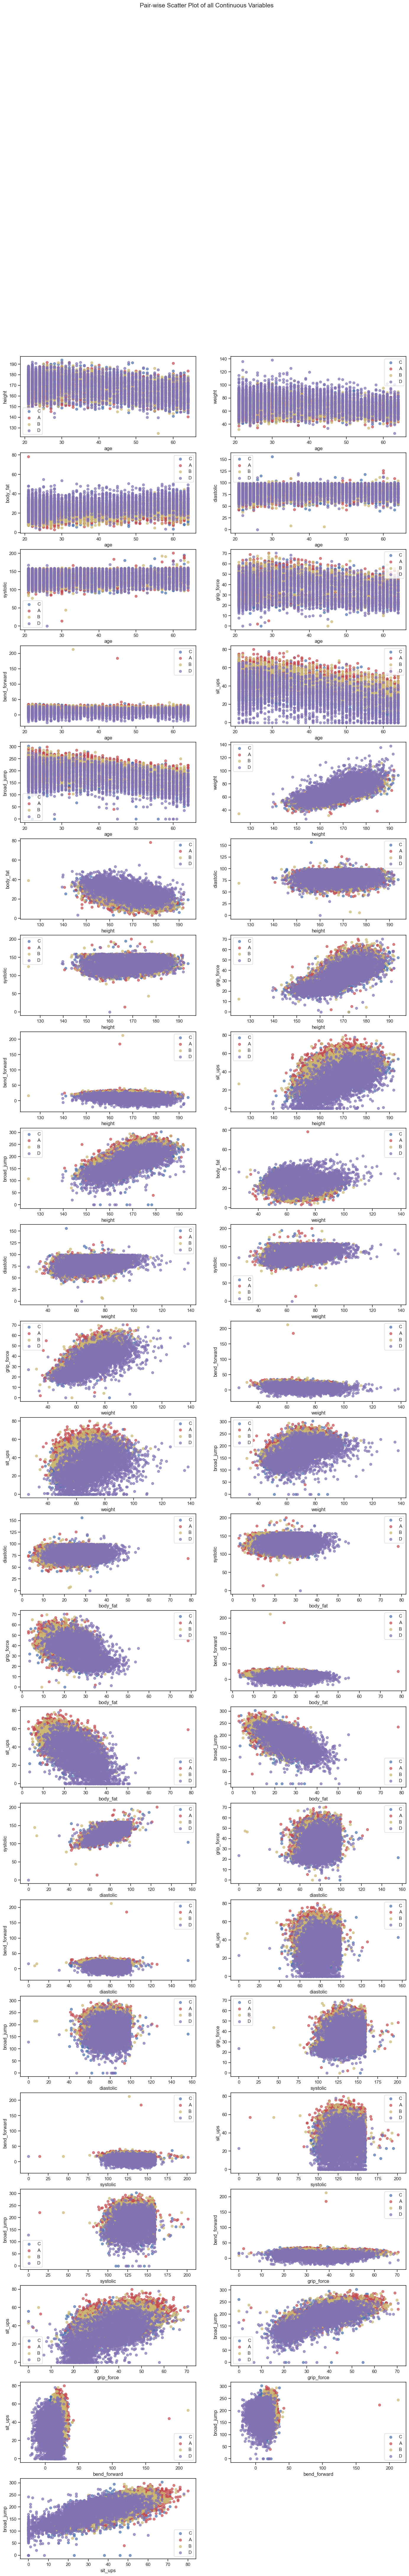

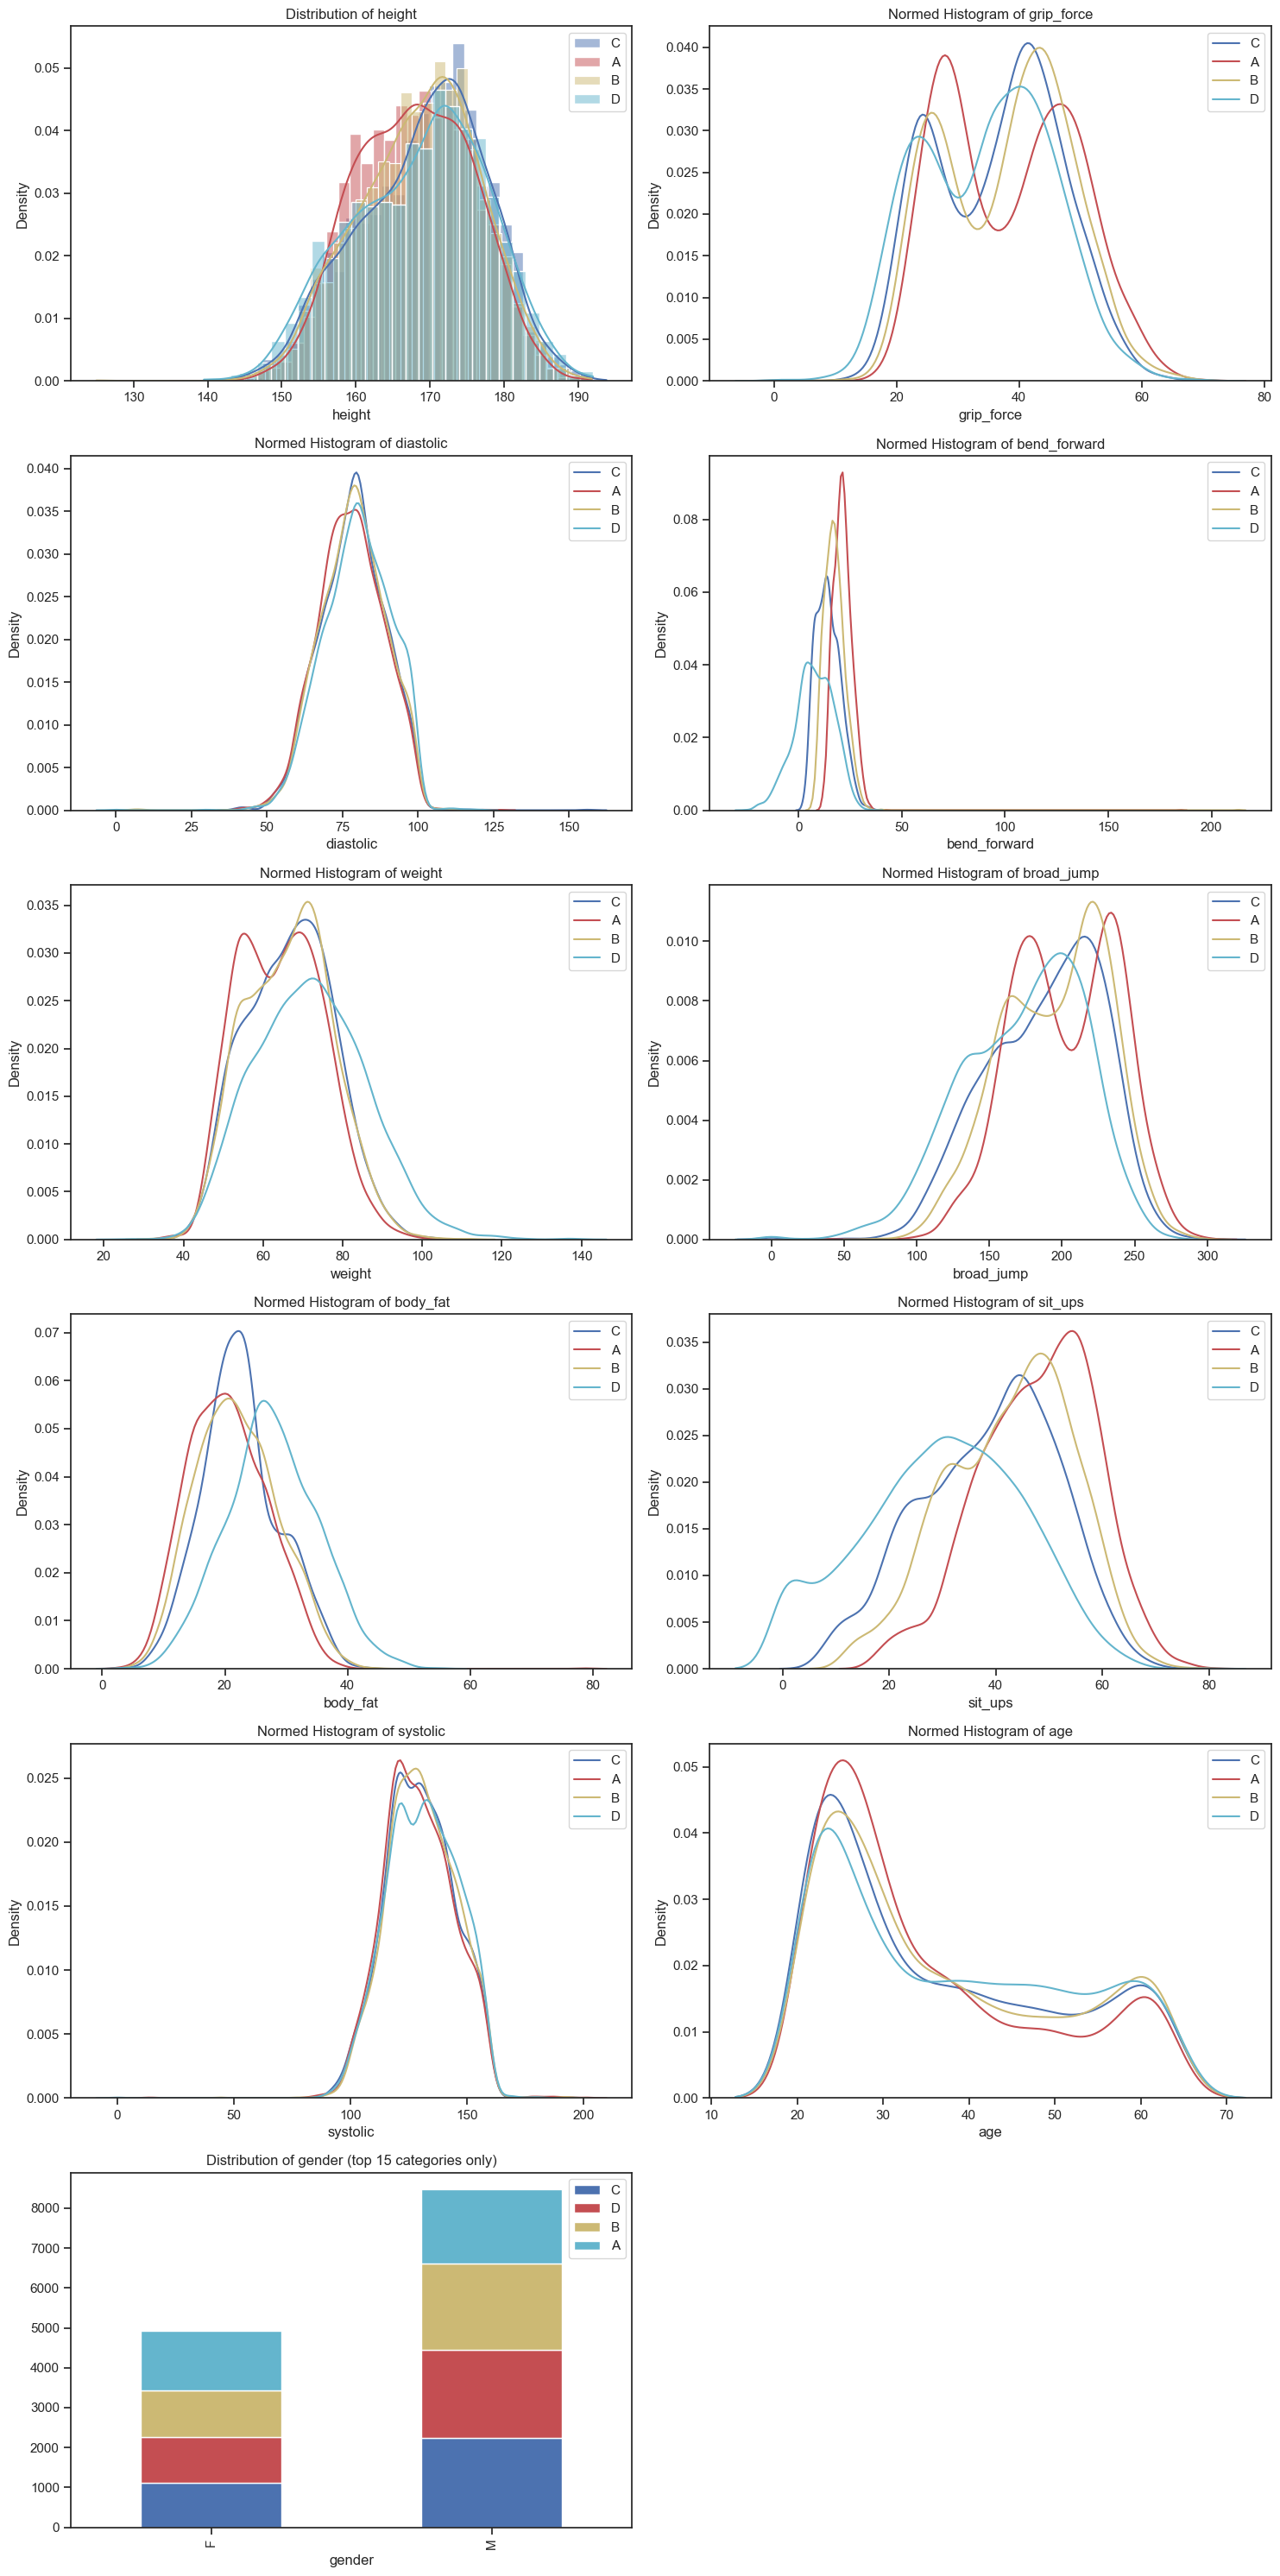

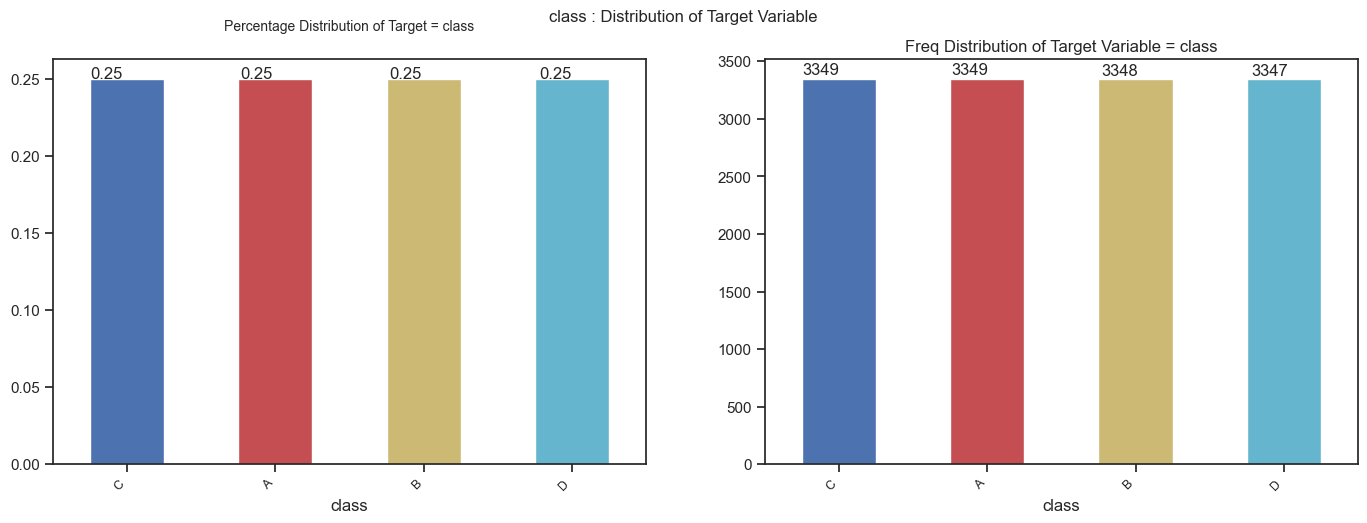

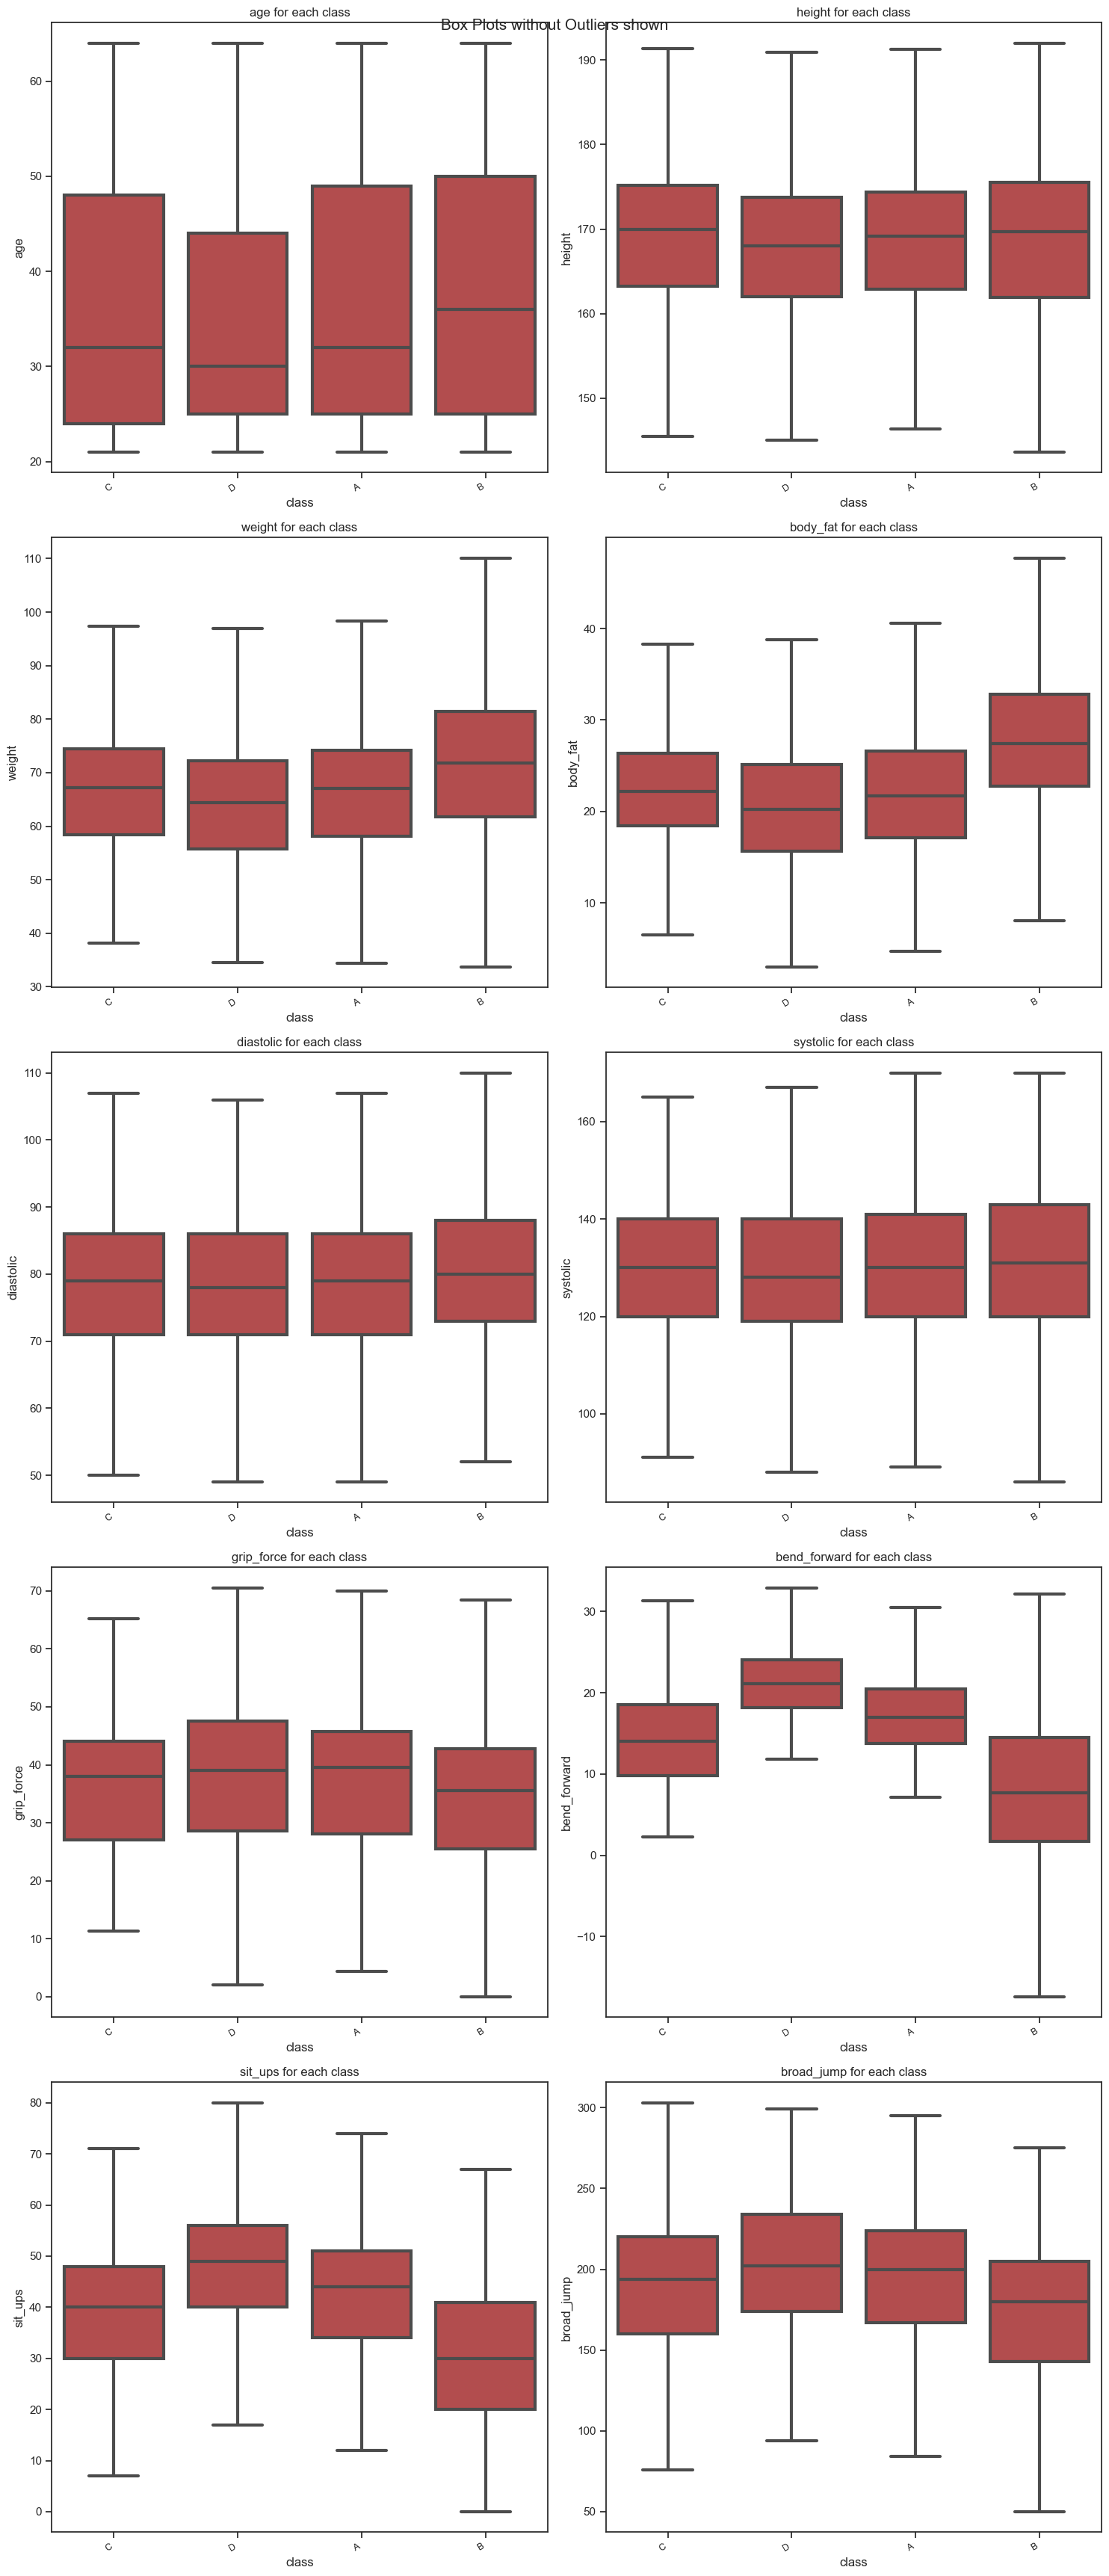

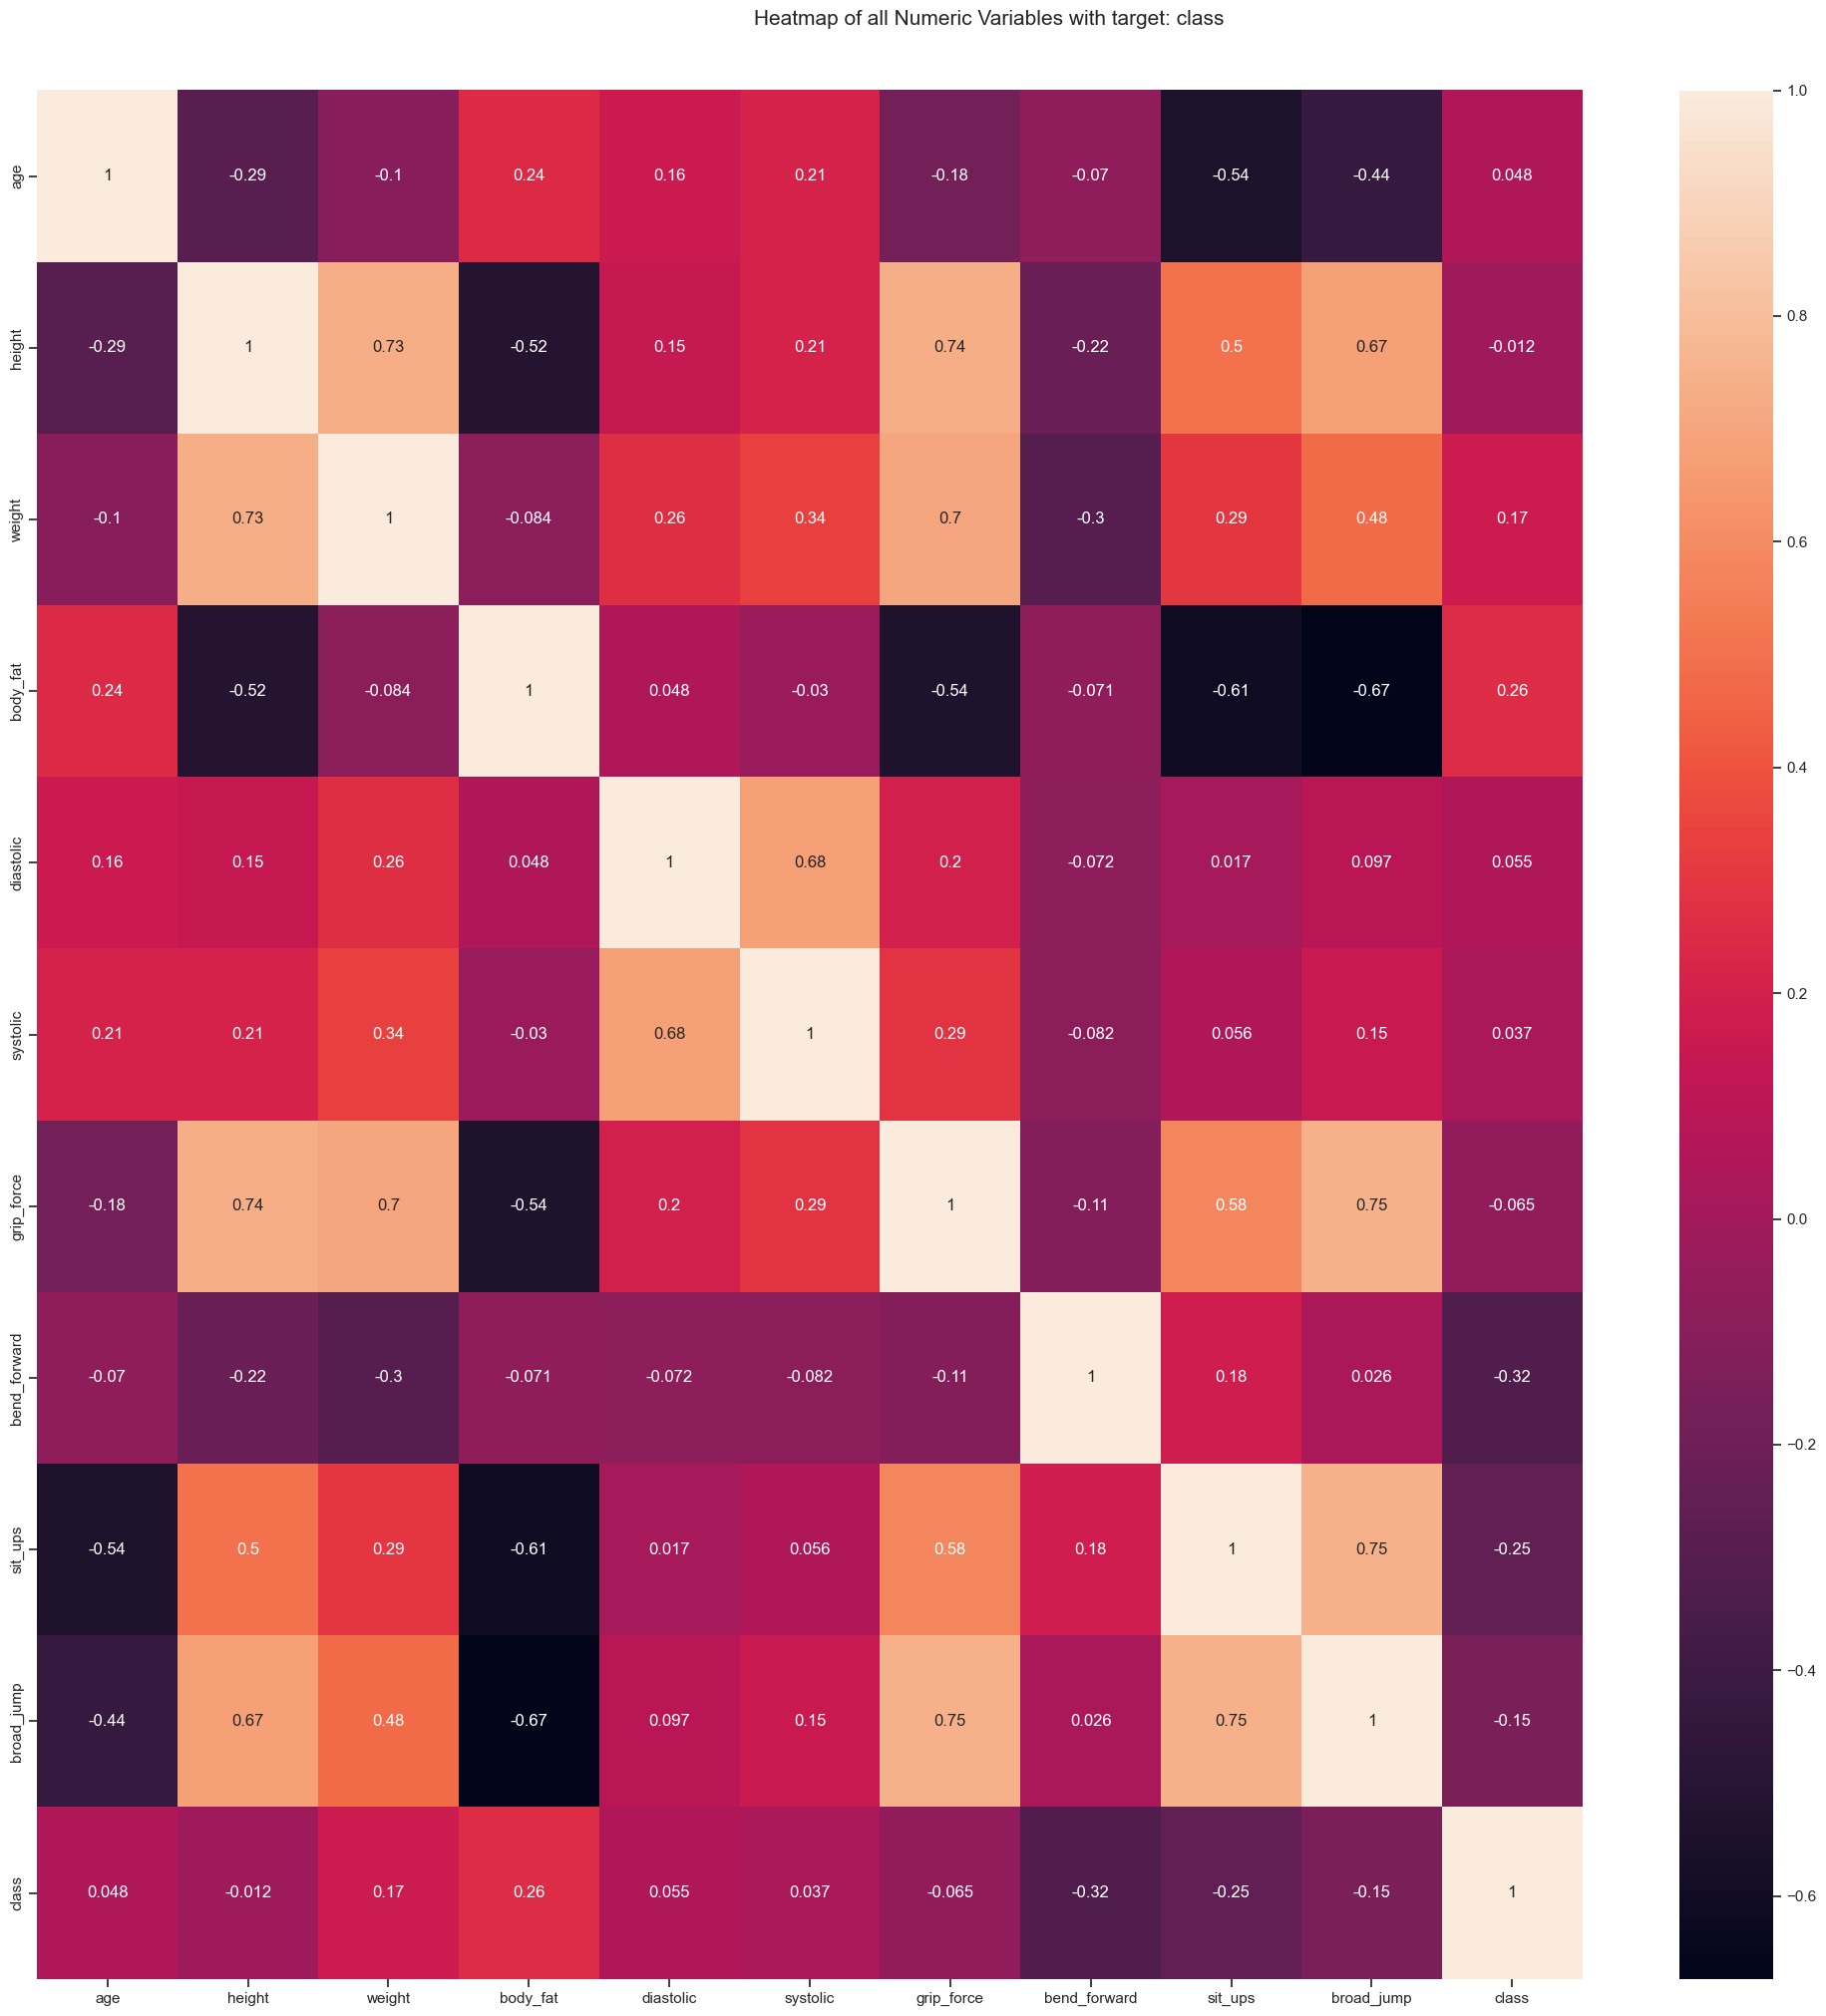

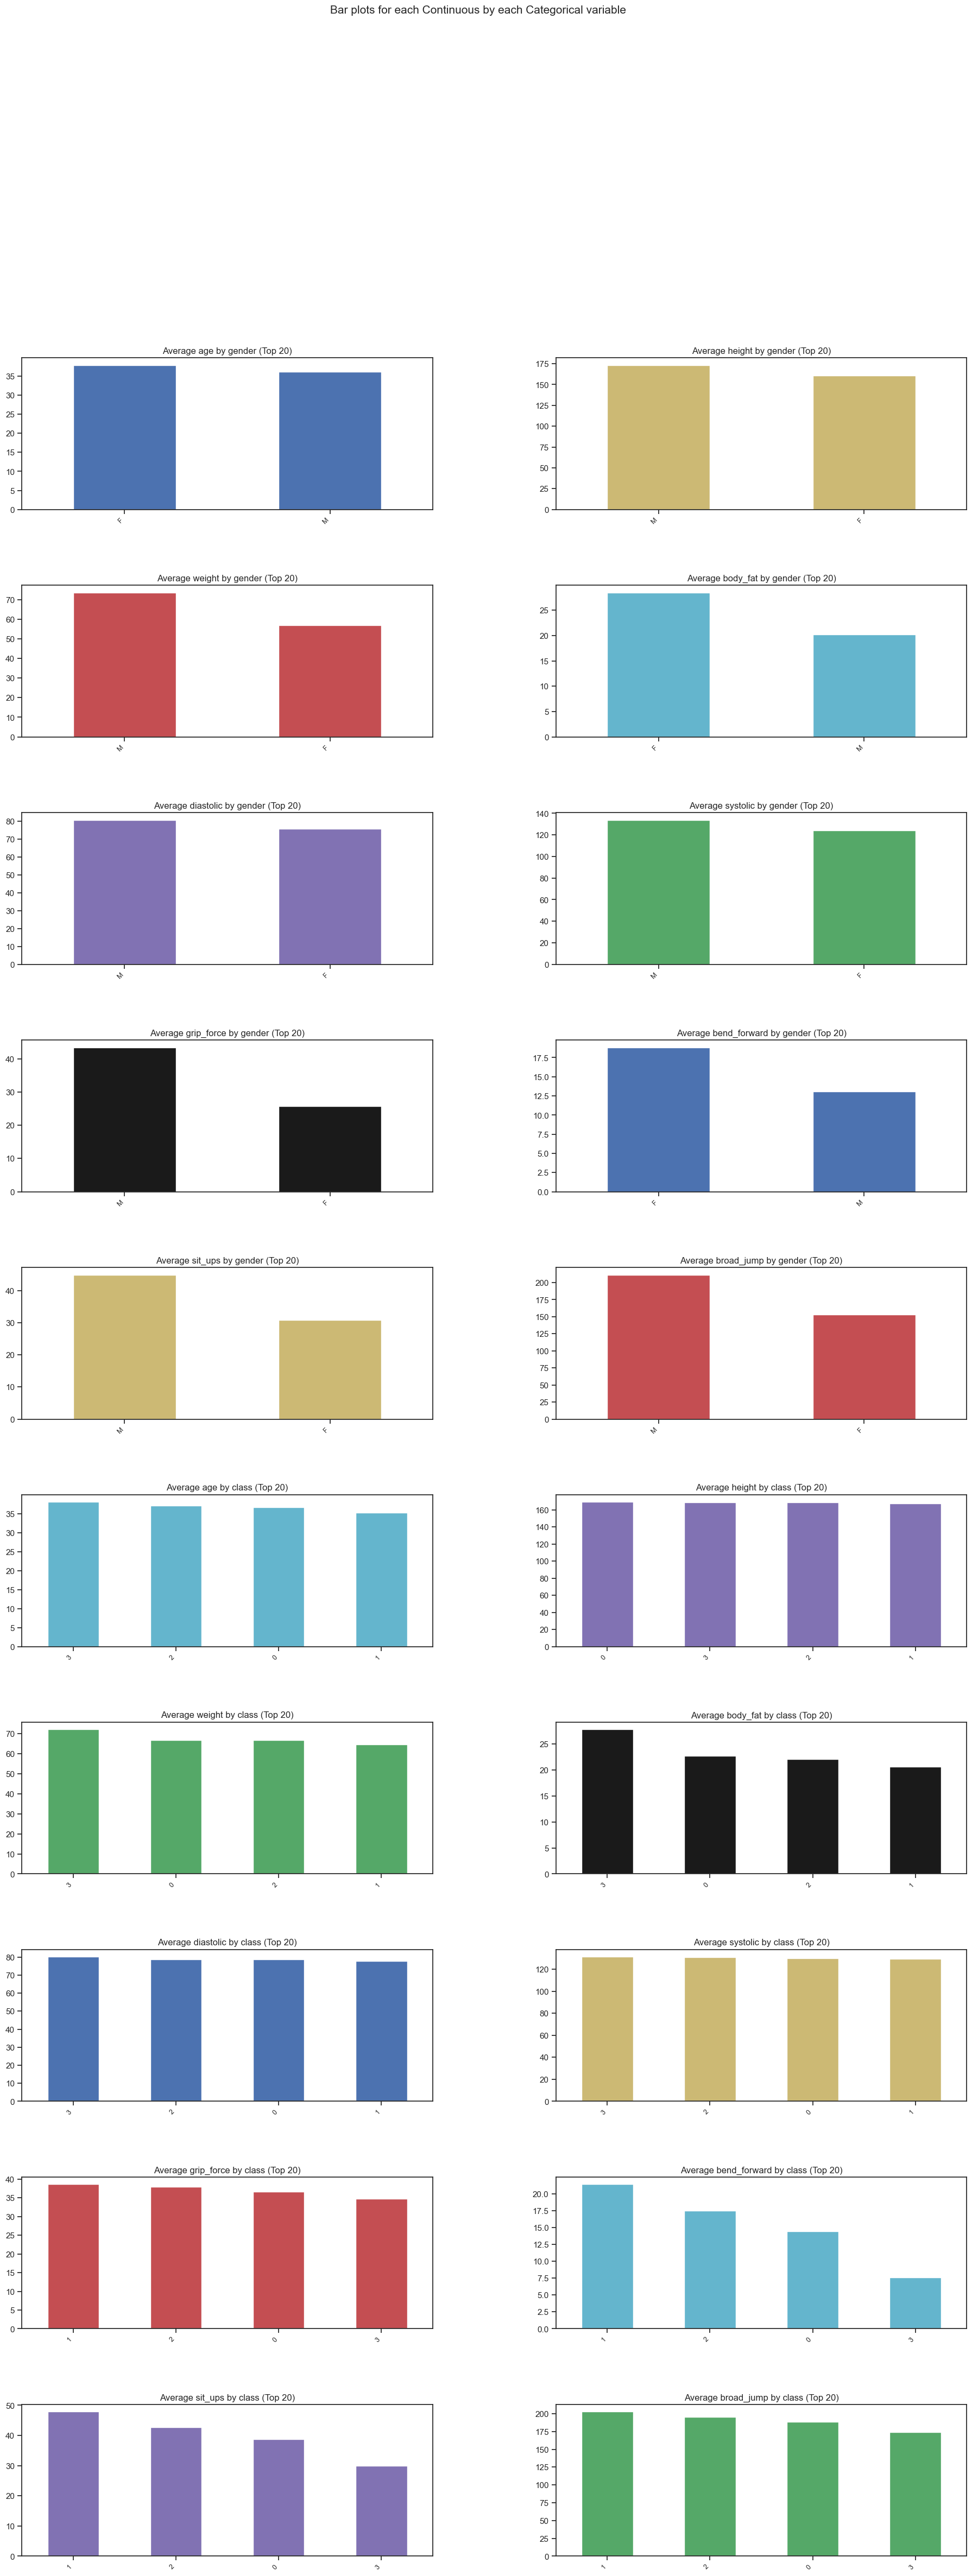

All Plots done
Time to run AutoViz = 12 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [104]:
"""# AutoViz, Python'da kullanılan bir otomatik görselleştirme (automated data visualization) kütüphanesidir.
Veri setini tek bir komutla otomatik olarak analiz edip, veri keşfi (EDA: Exploratory Data Analysis) için: 
grafikler, özetler, dağılımlar, ilişkiler gibi görselleri kendisi oluşturur."""
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
# AutoViz çalıştırma komutu:
dft = AV.AutoViz(
    depVar='class',           # Bağımlı değişkenin adı (target). Burada 'class' sütununu hedef alıyoruz.
    dfte=df,                  # DataFrame nesnesi. CSV dosyası vermediğimiz için doğrudan DataFrame gönderiyoruz.
    header=0,                 # DataFrame içinde başlık satırı var mı? 0 → ilk satır başlık kabul edilir.
    verbose=0,                # Çalışma mesajlarını gösterme seviyesi. 0: sessiz, 1: orta detay, 2: tam detay.
    lowess=False,             # Düşük düzeyli eğilim çizgisi eklemesin (Lowess smoothing çizgisi çizilmez).
    chart_format='svg',       # Çıktı grafik formatı. 'svg': vektör tabanlı, yüksek kalite (alternatif: 'png').
    max_rows_analyzed=1500000,# Analiz edilecek maksimum satır sayısı. Burada 1.5 milyon satıra kadar izin veriyoruz.
    max_cols_analyzed=300,    # Analiz edilecek maksimum sütun sayısı. Burada 300 sütuna kadar izin veriyoruz.
    filename='',              # Dosya yolu (boş bırakıldı çünkü DataFrame verdik, dosya okumuyoruz).
    sep=','                  # CSV dosyası kullanılsaydı sütun ayırıcı. Burada etkisiz çünkü dfte kullanıyoruz.
)
# dft: AutoViz'in temizleyip analiz ettiği, işlenmiş DataFrame çıktısı.

In [105]:
df.describe()

age         height        weight       body_fat      diastolic   \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240165     78.796842   
std       13.625639      8.426583     11.949666      7.256844     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

         systolic     grip_force   bend_forward     sit_ups     broad_jump   
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000  
mean     130.234817     36.963877     15.209268     39.771224    190.129627  
std       14.713954     10.624864      8.456677     14.276698     39.868000  
min        0.000000      0.000000    -25.000000      0.000000      0.000000  
25%      120.000000     27.500000     10.900000     30.000000    162.000000  
50%      130.000000     37.900000     16.200000     41.000000    193.000000  
75%      141.000000     45.200000     20.700000     50.000000    221.000000  
max      201.000000     70.500000    213.000000     80.000000    303.000000

In [106]:
df.groupby(by = 'class').describe()

age                                                        height  \
       count     mean       std      min   25%   50%   75%   max   count    
class                                                                       
A      3348.0  35.268220  12.999128  21.0  25.0  30.0  44.0  64.0  3348.0   
B      3347.0  37.074096  13.704285  21.0  25.0  32.0  49.0  64.0  3347.0   
C      3349.0  36.699612  13.780536  21.0  24.0  32.0  48.0  64.0  3349.0   
D      3349.0  38.058226  13.859808  21.0  25.0  36.0  50.0  64.0  3349.0   

                                                                weight  \
          mean       std     min    25%    50%    75%    max    count    
class                                                                    
A      167.871027  7.837863  140.5  162.0  168.0  173.8  191.8  3348.0   
B      168.580311  8.131097  125.0  162.9  169.2  174.4  191.8  3347.0   
C      169.162168  8.522572  141.0  163.2  170.0  175.2  193.8  3349.0   
D      168.625530  9.113937  139.5  161.9  169.7  175.5  192.0  3349.0   

                                                              body_fat  \
         mean       std      min   25%   50%     75%    max    count     
class                                                                    
A      64.418178  10.551538  34.5  55.7  64.46  72.285  101.4  3348.0    
B      66.612420  10.877303  31.9  58.2  67.10  74.250  111.8  3347.0    
C      66.760314  10.863968  38.1  58.4  67.20  74.500  103.6  3349.0    
D      71.996948  13.876440  26.3  61.7  71.80  81.400  138.1  3349.0    

                                                        diastolic             \
         mean       std    min   25%   50%   75%   max    count      mean      
class                                                                          
A      20.539159  6.435533  3.0  15.7  20.2  25.1  78.4   3348.0   77.903345   
B      22.039981  6.648113  4.7  17.1  21.7  26.6  44.5   3347.0   78.656468   
C      22.644564  6.273248  3.5  18.4  22.2  26.4  43.0   3349.0   78.550672   
D      27.735432  7.510994  3.5  22.8  27.4  32.8  54.9   3349.0   80.076530   

                                                systolic              \
         std      min   25%   50%   75%   max    count       mean      
class                                                                  
A      10.599650  41.0  71.0  78.0  86.0  126.0  3348.0   129.290024   
B      10.659483   6.0  71.0  79.0  86.0  112.0  3347.0   130.639349   
C      10.635956  40.0  71.0  79.0  86.0  156.2  3349.0   129.925351   
D      10.956690   0.0  73.0  80.0  88.0  120.0  3349.0   131.084503   

                                                   grip_force             \
         std      min   25%    50%    75%    max     count       mean      
class                                                                      
A      14.769349  14.0  119.0  128.0  140.0  201.0   3348.0    38.615723   
B      14.484209  43.9  120.0  130.0  141.0  193.0   3347.0    37.910436   
C      14.519292  91.0  120.0  130.0  140.0  195.0   3349.0    36.582663   
D      15.019393   0.0  120.0  131.0  143.0  181.0   3349.0    34.747746   

                                               bend_forward             \
         std     min   25%   50%    75%   max     count        mean      
class                                                                    
A      10.890453  2.1  28.6  39.05  47.6  70.5    3348.0     21.391777   
B      10.393415  0.0  28.1  39.60  45.7  69.9    3347.0     17.467586   
C      10.217417  0.0  27.1  38.00  44.1  65.2    3349.0     14.390645   
D      10.580542  0.0  25.5  35.60  42.8  70.4    3349.0      7.590260   

                                               sit_ups                        \
         std     min   25%   50%   75%   max    count     mean       std       
class                                                                          
A      5.123960  11.8  18.2  21.1  24.1  185.0  3348.0  47.848268  10.81

In [107]:
df.dtypes

age             float64
gender           object
height          float64
weight          float64
body_fat        float64
diastolic       float64
systolic        float64
grip_force      float64
bend_forward    float64
sit_ups         float64
broad_jump      float64
class            object
dtype: object

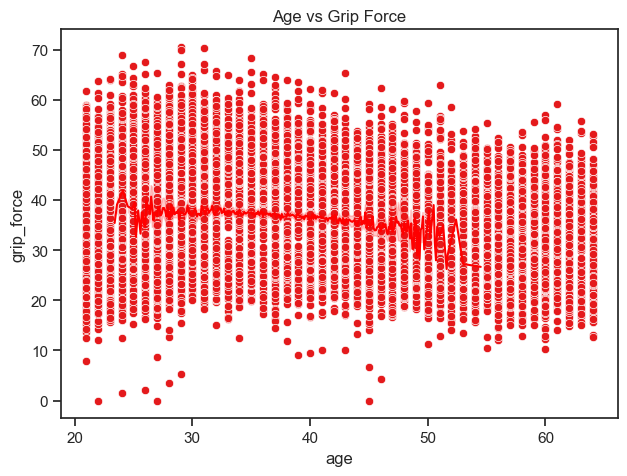

In [108]:
# Örnek: yaş vs grip_force
sns.scatterplot(x='age', y='grip_force', data=numeric_data)
sns.lineplot(x='age', y='grip_force', data=numeric_data.rolling(10).mean(), color='red')
plt.title("Age vs Grip Force")
plt.show()

# Veri ön işleme işlemleri

In [109]:
df.dtypes

age             float64
gender           object
height          float64
weight          float64
body_fat        float64
diastolic       float64
systolic        float64
grip_force      float64
bend_forward    float64
sit_ups         float64
broad_jump      float64
class            object
dtype: object

In [110]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
df['gender'] = lab.fit_transform(df['gender'])


In [111]:
df['class'] = pd.Categorical(df['class'], categories=['D', 'C', 'B', 'A'], ordered=True)
df['class_code'] = df['class'].map({'A': 4, 'B': 3, 'C': 2, 'D': 1})
df.dtypes

age              float64
gender             int64
height           float64
weight           float64
body_fat         float64
diastolic        float64
systolic         float64
grip_force       float64
bend_forward     float64
sit_ups          float64
broad_jump       float64
class           category
class_code      category
dtype: object

In [112]:
new_df = df.drop(columns=['class']).copy()
new_df['class_code'] = new_df['class_code'].astype(int)

new_df.dtypes

age             float64
gender            int64
height          float64
weight          float64
body_fat        float64
diastolic       float64
systolic        float64
grip_force      float64
bend_forward    float64
sit_ups         float64
broad_jump      float64
class_code        int64
dtype: object

In [113]:
df.head()

age  gender  height  weight  body_fat  diastolic  systolic  grip_force  \
0  27.0     1     172.3   75.24    21.3      80.0       130.0      54.9      
1  25.0     1     165.0   55.80    15.7      77.0       126.0      36.4      
2  31.0     1     179.6   78.00    20.1      92.0       152.0      44.8      
3  32.0     1     174.5   71.10    18.4      76.0       147.0      41.4      
4  28.0     1     173.8   67.70    17.1      70.0       127.0      43.5      

   bend_forward  sit_ups  broad_jump class class_code  
0      18.4       60.0       217.0      C       2      
1      16.3       53.0       229.0      A       4      
2      12.0       49.0       181.0      C       2      
3      15.2       53.0       219.0      B       3      
4      27.1       45.0       217.0      B       3

In [114]:
new_df.rename(columns={'class_code': 'class'}, inplace=True)
new_df.to_csv('kesifselVeriAnalizi.csv', index=False)